In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from datetime import datetime
from matplotlib import cm, colors
from read_data import DataAnalysis

In [2]:
# Reading data
data = pd.read_csv("latestdata.csv", low_memory=False)

In [3]:
# Constructing times list
times = []
a = np.array(data['date_onset_symptoms'])
b = np.array(data['date_death_or_discharge'])

for i in range(a.size):
    if type(a[i]) == str and type(b[i]) == str:
        times.append((a[i], b[i]))

In [42]:
def date_to_days(date):
    date1_aux = datetime.strptime(date[0][:10], '%d.%m.%Y')
    date2_aux = datetime.strptime(date[1][:10], '%d.%m.%Y')
    
    return (date2_aux - date1_aux).days

dataset = np.array(list(map(lambda x: date_to_days(x), times)))
dataset = dataset[dataset > 0]

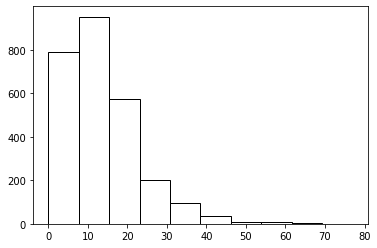

In [5]:
plt.hist(dataset, ec='black', color='white')
plt.show()

In [43]:
def tuple_to_string(pair):
    string = "Distribution = " + pair[0] + "\n"
    string += "p = " + str(pair[1]) + "\n"
    return string + "Parameters = " + str(pair[-1]) + "\n======="

fitting = []
possible_distributions = ["beta", "gamma", "lognorm"]
for distribution in possible_distributions:
    dist = getattr(st, distribution)
    params = dist.fit(dataset, floc=0)
    _, p_value = st.kstest(dataset, distribution, args=params)
    fitting.append((distribution, p_value, params))
    
fitting_str = list(map(lambda x: tuple_to_string(x), sorted(fitting, key=lambda y: y[1], reverse=True)))
for fit in fitting_str:
    print(fit)

Distribution = beta
p = 0.00033659424023111957
Parameters = (1.8875069823269832, 22.98864037245216, 0, 182.79488908499076)
Distribution = gamma
p = 4.57717329986598e-05
Parameters = (2.030355526529144, 0, 6.828000066872237)
Distribution = lognorm
p = 1.3985334649516933e-20
Parameters = (0.8041395469908431, 0.0, 10.624998225825738)


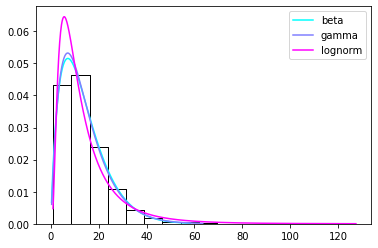

In [48]:
index = 0
color1 = plt.get_cmap('cool')
color_norm = colors.Normalize(vmin=0, vmax=len(fitting) - 1)
scalar_map = cm.ScalarMappable(norm=color_norm, cmap=color1)
for fit in fitting:    
    dist1 = getattr(st, fit[0])
    params = fit[2]
    x1 = np.linspace(dist1.ppf(0.001, *params), dist1.ppf(0.999, *params), 1000)
    plt.plot(x1, dist1.pdf(x1, *params), color=scalar_map.to_rgba(index), label=fit[0])
    plt.hist(dataset, ec='black', color='white', density=True)
    index += 1

plt.legend()
plt.savefig("fitting-time.pdf", bbox_inches='tight')
plt.show()

In [7]:
da = DataAnalysis()
da.set_data(dataset)
da.fitting_test(show=True)

/usr/local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:4963: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


1. beta         REJECT
		P-value for test 0.000762654301147389
		Parameters       [2.2013107451445233, 10.717146836215813, -1.9246552709951565, 91.07534239652027]
2. invweibull   REJECT
		P-value for test 0.00040532472955617056
		Parameters       [11.831498275500337, -72.62682543293425, 81.49408118550588]
3. johnsonsu    REJECT
		P-value for test 0.00016627021367985099
		Parameters       [-7.53554976037641, 2.1020152494192077, -6.332766204532429, 0.9827706224439661]
4. lognorm      REJECT
		P-value for test 0.00013135972376772699
		Parameters       [0.47740082635972425, -6.3199769029556485, 17.676294797088012]
5. invgauss     REJECT
		P-value for test 0.00011041857011582027
		Parameters       [0.23742571720320568, -6.820863155769764, 85.41063065052823]
6. johnsonsb    REJECT
		P-value for test 5.834509767400105e-05
		Parameters       [2.858404856943147, 1.477129618339784, -3.644691527459397, 118.68134082159258]
7. gamma        REJECT
		P-value for test 9.233742156446244e-06
		Parameter